# Sklearn

## sklearn.linear_model

In [5]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [7]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

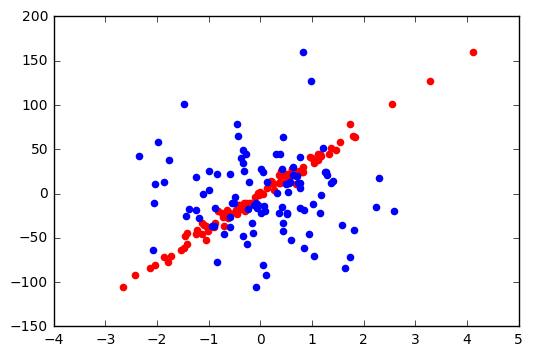

In [19]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

In [20]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [21]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [23]:
print (test_labels)

[  34.35183007   13.31981235  -11.18242389   78.24817537   17.64282734
  -32.71074998   25.24428409  -19.16792315  -10.29545833  101.14760598
   13.02656201  -36.44717565  -35.32062686  -32.92158843  -13.99339669
    4.45578287   28.15553021   51.87072011   49.41686419  -37.31870104
   64.19559505   39.70663436  -42.44469577   27.83791274    5.86887774
  -22.32195021  -18.57607726   44.66274342  -21.47606913   12.74038341]


In [24]:
print (predictions)

[ 38.41741282  14.13674122 -13.84252722  65.5073383   21.97247652
 -44.06533489  14.01879888 -10.61074671 -11.93492831  95.72598124
  18.2486685  -42.21807949 -41.85763809 -34.74029386 -15.52426333
   8.13146847  22.12591339  52.42797178  55.08077494 -36.00137298
  69.77933602  37.12459503 -39.78153678  22.78085087   4.42614456
 -22.82758451 -25.34615836  50.5070414  -18.39144901   5.90869096]


In [25]:
metrics.mean_absolute_error(test_labels, predictions)

4.7099963092875976

In [27]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779695, std: 1.0737104492890204


In [28]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [30]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [31]:
coef

array([ 38.07925837,   0.        ])

In [32]:
linear_regressor.coef_

array([ 38.34937207,   0.77184317])

In [33]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.94466490348974741

In [34]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [35]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.35*x1 + 0.77*x2 + -0.94


#### Lasso

In [36]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [37]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print ('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [38]:
print (lasso_regressor.coef_)

[ 37.59876148   0.        ]


In [39]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [40]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.60*x1 + 0.00*x2
